In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns #6-09-2022

In [1]:
import sklearn

In [5]:
print(sklearn.__version__)


0.24.1


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("pima-indians-diabetes-2.csv")
df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.shape

(768, 9)

In [5]:
df.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [6]:
# After reviewing the ds we came to conclusion that both class and preg columns can have 0 values in the columns

In [7]:
# And class column don't need one hot encoding as it's already classified into 0 & 1

In [8]:
df.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [9]:
df.describe(include='all')

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# So we need to change the 0 values of remaining columns with mean or median since these are int or float column types
# if those are obj types then we have to use mode

In [11]:
plas = df['Plas'].median()
plas

117.0

In [12]:
df['Plas'].replace(0, plas, inplace=True)

In [13]:
df.head(78)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
73,4,129,86,20,270,35.1,0.231,23,0
74,1,79,75,30,0,32.0,0.396,22,0
75,1,117,48,20,0,24.7,0.140,22,0
76,7,62,78,0,0,32.6,0.391,41,0


In [14]:
df['Pres'].replace(0, df['Pres'].mean(), inplace=True)
df.head(18)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72.000000,35,0,33.6,0.627,50,1
1,1,85,66.000000,29,0,26.6,0.351,31,0
2,8,183,64.000000,0,0,23.3,0.672,32,1
3,1,89,66.000000,23,94,28.1,0.167,21,0
4,0,137,40.000000,35,168,43.1,2.288,33,1
5,5,116,74.000000,0,0,25.6,0.201,30,0
6,3,78,50.000000,32,88,31.0,0.248,26,1
7,10,115,69.105469,0,0,35.3,0.134,29,0
8,2,197,70.000000,45,543,30.5,0.158,53,1
9,8,125,96.000000,0,0,0.0,0.232,54,1


In [15]:
df['skin'].replace(0, df['skin'].mean(), inplace=True)
df.head(15)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72.000000,35.000000,0,33.6,0.627,50,1
1,1,85,66.000000,29.000000,0,26.6,0.351,31,0
2,8,183,64.000000,20.536458,0,23.3,0.672,32,1
3,1,89,66.000000,23.000000,94,28.1,0.167,21,0
4,0,137,40.000000,35.000000,168,43.1,2.288,33,1
5,5,116,74.000000,20.536458,0,25.6,0.201,30,0
6,3,78,50.000000,32.000000,88,31.0,0.248,26,1
7,10,115,69.105469,20.536458,0,35.3,0.134,29,0
8,2,197,70.000000,45.000000,543,30.5,0.158,53,1
9,8,125,96.000000,20.536458,0,0.0,0.232,54,1


In [16]:
df['test'].replace(0, df['test'].mean(), inplace=True)
df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72.000000,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66.000000,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64.000000,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66.000000,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40.000000,35.000000,168.000000,43.1,2.288,33,1
5,5,116,74.000000,20.536458,79.799479,25.6,0.201,30,0
6,3,78,50.000000,32.000000,88.000000,31.0,0.248,26,1
7,10,115,69.105469,20.536458,79.799479,35.3,0.134,29,0
8,2,197,70.000000,45.000000,543.000000,30.5,0.158,53,1
9,8,125,96.000000,20.536458,79.799479,0.0,0.232,54,1


In [17]:
df['mass'].replace(0, df['mass'].median(), inplace=True)
df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72.000000,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66.000000,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64.000000,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66.000000,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40.000000,35.000000,168.000000,43.1,2.288,33,1
5,5,116,74.000000,20.536458,79.799479,25.6,0.201,30,0
6,3,78,50.000000,32.000000,88.000000,31.0,0.248,26,1
7,10,115,69.105469,20.536458,79.799479,35.3,0.134,29,0
8,2,197,70.000000,45.000000,543.000000,30.5,0.158,53,1
9,8,125,96.000000,20.536458,79.799479,32.0,0.232,54,1


In [18]:
# For duplicates
# Checking Duplicates
duplicate = df.duplicated()
duplicate.sum()

0

In [19]:
df[duplicate]

,Preg,Plas,Pres,skin,test,mass,pedi,age,class


<AxesSubplot:>

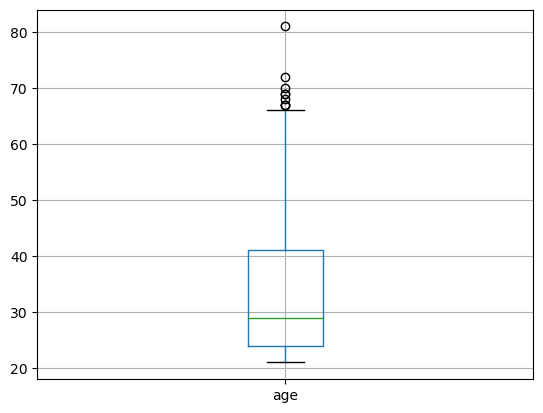

In [20]:
# Checking and removing the outliers using boxplot
df.boxplot(column='age')

In [21]:
# Function for removing the outliers from 1column
def remove_outliers(col):
    sorted(col)
    q1, q3 = col.quantile([0.25,0.75])
    iqr = q3-q1
    lower_range = q1-(1.5*iqr)
    upper_range = q3+(1.5*iqr)
    col = np.where(col>upper_range, upper_range, col)
    col = np.where(col<lower_range, lower_range, col)
    return col

In [22]:
# for column in df.iteritems():
#     lowledtime, uppleadtime = remove_outliers(df[column])
#     df[column] = np.where(df[column]>uppleadtime, uppleadtime, df[column])
#     df[column] = np.where(df[column]<lowledtime, lowledtime, df[column])
columns = ['Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age']
for colm in columns:
    df[colm] = remove_outliers(df[colm])

<AxesSubplot:>

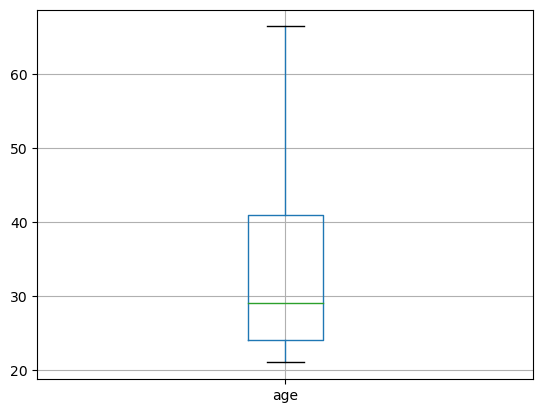

In [23]:
df.boxplot(column='age')

In [24]:
# Importing and preparing model
X = df.drop(['class'], axis = 1)
y = df[['class']]

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [25]:
# Logi regression model
import warnings
warnings.filterwarnings('ignore')

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [26]:
log_reg.score(X_train, y_train)

0.7672253258845437

In [27]:
log_reg.score(X_test, y_test)

0.7575757575757576

In [28]:
predic = log_reg.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predic)

0.7575757575757576

<AxesSubplot:>

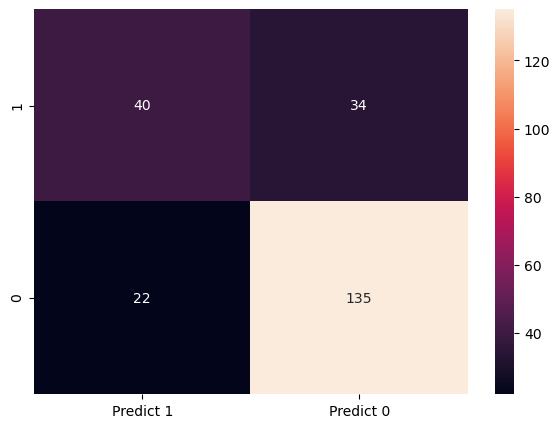

In [30]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predic, labels=[1,0])
df_cm = pd.DataFrame(cm, index=[i for i in ["1", "0"]],
                    columns=[i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [31]:
cm = metrics.confusion_matrix(y_test, predic)
cm

array([[135,  22],
       [ 34,  40]], dtype=int64)

In [32]:
df.shape

(768, 9)

In [33]:
144+15+37+35

231

In [34]:
(144+35)/(144+15+37+35)#Which is equal to accuracy score

0.7748917748917749

In [35]:
# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
de_cl = DecisionTreeClassifier(max_depth= 2, criterion='entropy')


In [37]:
de_cl.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [38]:
de_cl.score(X_train, y_train)

0.7746741154562383

In [39]:
de_cl.score(X_test, y_test)

0.7359307359307359

In [40]:
# K-NN below

In [41]:
from sklearn.neighbors import KNeighborsClassifier
k_c = KNeighborsClassifier(n_neighbors=23)

In [42]:
k_c.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [43]:
k_c.score(X_train, y_train)

0.7746741154562383

In [44]:
k_c.score(X_test, y_test)

0.7316017316017316

In [45]:
# SVM Below

In [46]:
from sklearn.svm import SVC
sc = SVC(kernel='linear', gamma='auto')


In [47]:
sc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [48]:
sc.score(X_train, y_train)

0.776536312849162

In [49]:
sc.score(X_test, y_test)

0.7662337662337663

In [50]:
# Bagging classifier below

In [51]:
from sklearn.ensemble import BaggingClassifier
bgc = BaggingClassifier(n_estimators=20)

In [52]:
bgc.fit(X_train, y_train)

BaggingClassifier(n_estimators=20)

In [53]:
bgc.score(X_train, y_train)

0.9906890130353817

In [54]:
bgc.score(X_test, y_test)

0.7445887445887446

In [55]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier(n_estimators=100, max_depth=3)

In [56]:
rc.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

In [57]:
rc.score(X_train, y_train)

0.8044692737430168

In [58]:
rc.score(X_test, y_test)

0.7532467532467533

In [59]:
# Naive Base Below

In [1]:
from sklearn.naive_bayes import GaussianNB
nc = GaussianNB()

In [61]:
nc.fit(X_train, y_train)

GaussianNB()

In [62]:
nc.score(X_train, y_train)

0.7672253258845437

In [63]:
nc.score(X_test, y_test)

0.7402597402597403

In [64]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [67]:
model_params = {
    'svm': {
        #sc: svm.SVC(gamma='auto'),
        'model':sc
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        #rc: RandomForestClassifier(),
        'model':rc
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        #log_reg: LogisticRegression(solver='liblinear',multi_class='auto'),
        'model':log_reg
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        de_cl: DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

SyntaxError: invalid syntax (227847710.py, line 5)

In [68]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(digits.data, digits.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

KeyError: 'model'